### Scikit-learn Agglomerative Clustering

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

iris = load_iris() # We will use the iris dataset without its labels
X = iris.data[:, 2:]
X_scaled = scale(X) # Scaling the data is useful when we are going to calculate a similarity/distance matrix between instances

In this example we will four three agglomerative clustering models: each one based on a different linkage policy for measuring the distance between clusters.
In all the models, we choose the euclidean distance as the distance metric.

Single linkage (nearest neighbor linkage) determines the distance between two clusters as the shortest distance between any two points in the two clusters. This method tends to produce long, chain-like clusters that are sensitive to outliers and noise in the data.

In [6]:
from sklearn.cluster import AgglomerativeClustering

modelo_hclust_single = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'single',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_single.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

Complete linkage (farthest neighbor linkage) determines the distance between two clusters as the longest distance between any two points in the two clusters. This method tends to produce compact, spherical clusters that are less sensitive to outliers and noise in the data.



In [7]:
modelo_hclust_complete = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

Average linkage determines the distance between two clusters as the average distance between all pairs of points in the two clusters. This method tends to produce clusters that are somewhere between the long, chain-like clusters produced by single linkage and the compact, spherical clusters produced by complete linkage.

In [8]:
modelo_hclust_average = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

Ward linkage (minimum variance linkage) determines the distance between two clusters by minimising the increase in variance when the two clusters are merged. This method tends to produce clusters that have similar variances and sizes.

In [9]:
modelo_hclust_ward = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Visualize the three model dendrograms to observe the cluster hierarchies created

In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Don't worry, you don't need to learn this manually defined method, we will simply call it three times later
    # because it will help us visualizing the dendrograms we learnt.

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

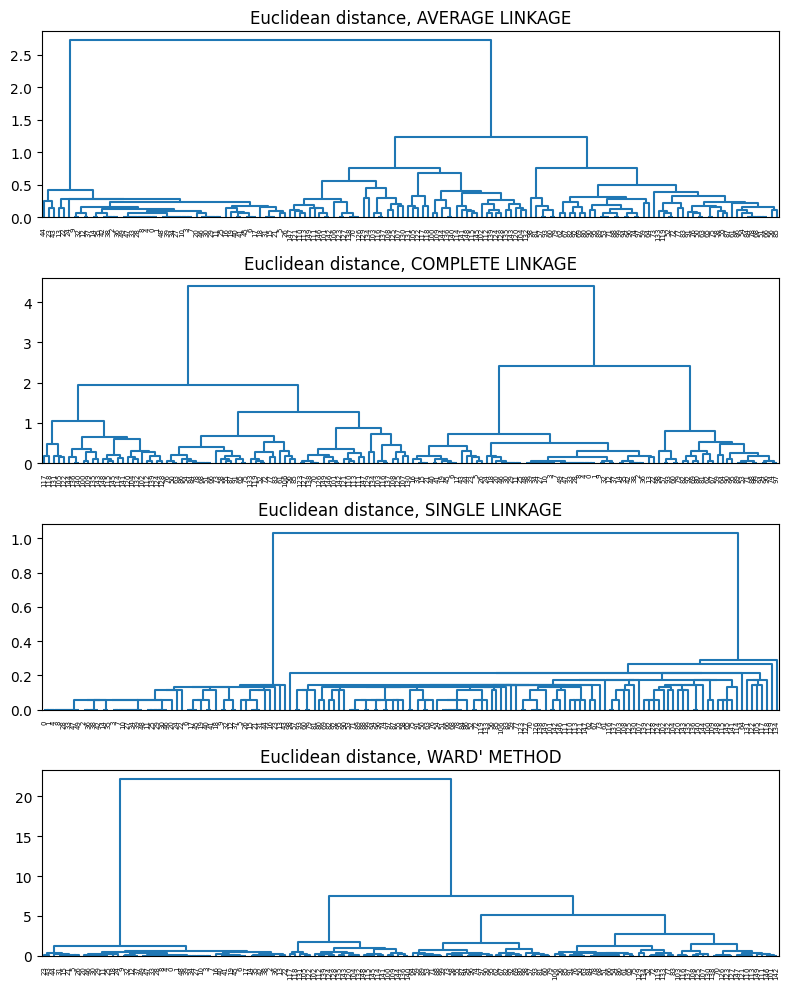

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(8, 10))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Euclidean distance, AVERAGE LINKAGE")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Euclidean distance, COMPLETE LINKAGE")
plot_dendrogram(modelo_hclust_single, color_threshold=0, ax=axs[2])
axs[2].set_title("Euclidean distance, SINGLE LINKAGE")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[3])
axs[3].set_title("Euclidean distance, WARD' METHOD")
plt.tight_layout();

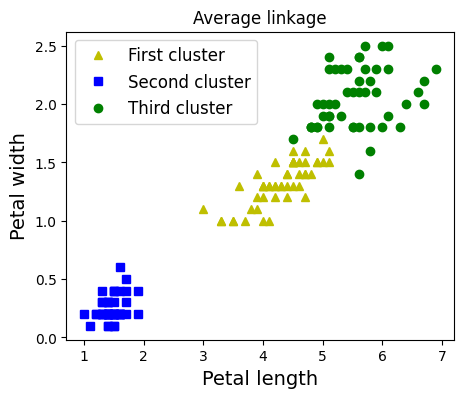

In [ ]:
modelo_hclust_average = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'average',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_average.fit_predict(X_scaled)

# Visualization of the resulting clusters
plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Average linkage")
plt.show()

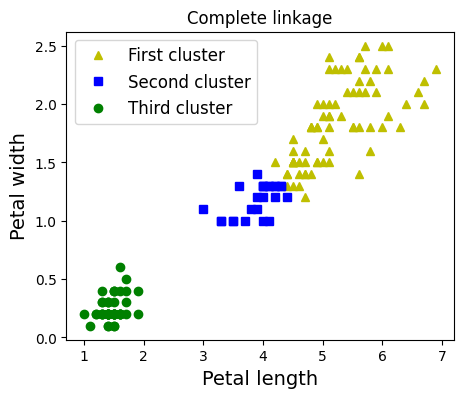

In [ ]:
modelo_hclust_complete = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'complete',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_complete.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Complete linkage")
plt.show()

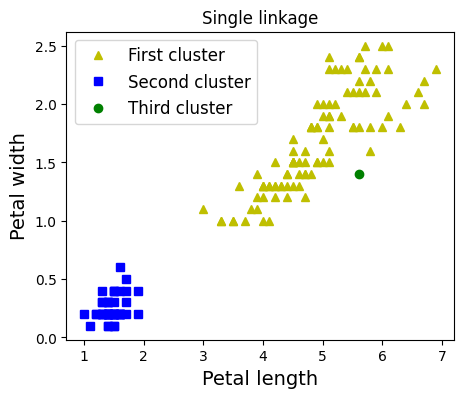

In [ ]:
modelo_hclust_single = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'single',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_single.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Single linkage")
plt.show()

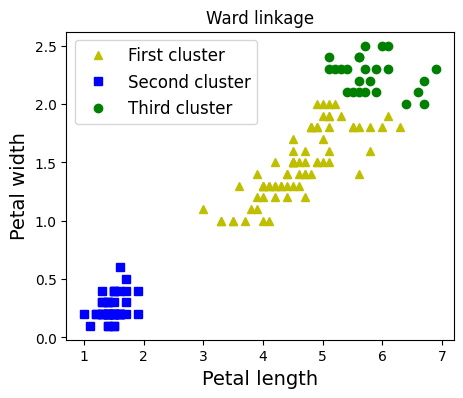

In [ ]:
modelo_hclust_single = AgglomerativeClustering(
                            metric  = 'euclidean',
                            linkage = 'ward',
                            n_clusters = 3
                     )
y_pred = modelo_hclust_single.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Ward linkage")
plt.show()

### Agglomerative Clustering from scratch

In [3]:
import numpy as np

class AgglomerativeClusteringScratch:
  def __init__(self, n_clusters=None, linkage='average'):
    # Use euclidean matric for computing pairwise distance matrix
    self.n_clusters = n_clusters

    if linkage == 'complete':
      self.linkage_distance_func = self.max_linkage_distance
    elif linkage == 'single':
      self.linkage_distance_func = self.min_linkage_distance
    elif linkage == 'average':
      self.linkage_distance_func = self.avg_linkage_distance
    elif linkage == 'ward':
      self.linkage_distance_func = self.ward_method_distance

  def avg_linkage_distance(self, cluster_A, cluster_B):
    # Compute average linkage distance between two clusters
    distance = 0
    for i in range(cluster_A.shape[0]):
      distance += np.linalg.norm(cluster_B - cluster_A[i, :], axis=1).sum()
    distance /= (cluster_A.shape[0] * cluster_B.shape[0])
    return distance

  def max_linkage_distance(self, cluster_A, cluster_B):
    # Compute maximum linkage distance between two clusters
    distance = 0
    for i in range(cluster_A.shape[0]):
      distance = np.append(np.linalg.norm(cluster_B - cluster_A[i, :], axis=1), distance).max()
    return distance

  def min_linkage_distance(self, cluster_A, cluster_B):
    # Compute minimum linkage distance between two clusters
    distance = np.inf
    for i in range(cluster_A.shape[0]):
      distance = np.append(np.linalg.norm(cluster_B - cluster_A[i, :], axis=1), distance).min()
    return distance

  def ward_method_distance(self, cluster_A, cluster_B):
    # Compute the Ward linkage distance between two clusters
    n_A = cluster_A.shape[0]
    n_B = cluster_B.shape[0]

    centroid_A = np.mean(cluster_A, axis=0)
    centroid_B = np.mean(cluster_B, axis=0)

    # Distance is proportional to the squared Euclidean distance between centroids
    # scaled by size of the clusters
    diff = centroid_A - centroid_B
    distance = (n_A * n_B) / (n_A + n_B) * np.dot(diff, diff)

    return distance

  def pairwise_distance(self, data, n_samples):
    # Compute the pairwise distance matrix in euclidean matric
    distance_mat = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(i + 1, n_samples):
        distance = np.linalg.norm(data[i] - data[j])
        distance_mat[i, j] = distance
        distance_mat[j, i] = distance
    return distance_mat

  def update(self, data, distance_mat, labels):
      #"Find closest clusters, merge clusters, delete cluster, update distance"
      idx_upper = np.triu_indices(distance_mat.shape[0], k=1)  # Index of upper part of distance matrix (skip diagonal)
      min_value = np.min(distance_mat[idx_upper])  # Value of idx_upper
      row, col = np.argwhere(distance_mat == min_value)[0]  # Index of min_value (same as d_kl)

      # Update label
      labels[labels == col] = row
      labels[labels > col] -= 1

      # Deleted the row and column 'col'
      distance_mat = np.delete(distance_mat, col, 0)
      distance_mat = np.delete(distance_mat, col, 1)

      # Update distance matrix
      for i in range(len(distance_mat)):
          distance_mat[row, i] = self.linkage_distance_func(data[labels == row], data[labels == i])
          distance_mat[i, row] = distance_mat[row, i]
      return distance_mat, labels

  def fit_predict(self, X):
    self.data = X
    self.n_samples = self.data.shape[0]
    self.initial_distance = self.pairwise_distance(self.data, self.n_samples)
    self.labels = np.arange(self.n_samples)
    self.distance_matrix = self.initial_distance.copy()
    while len(np.unique(self.labels)) > self.n_clusters:
      # Fill in the diagonal as infinity to determine that the distance is the same position.
      np.fill_diagonal(self.distance_matrix, np.inf)
      self.distance_matrix, self.labels = self.update(self.data, self.distance_matrix, self.labels)

    return self.labels

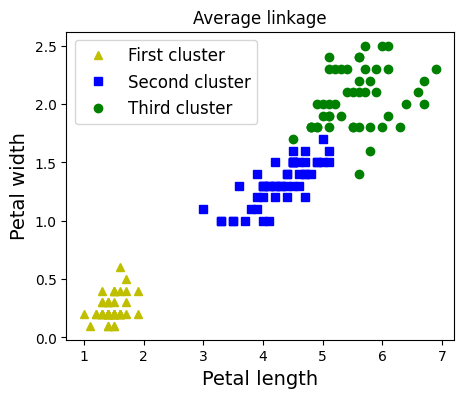

In [ ]:
ACS_avg = AgglomerativeClusteringScratch(n_clusters=3, linkage='average')
y_pred = ACS_avg.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Average linkage")
plt.show()

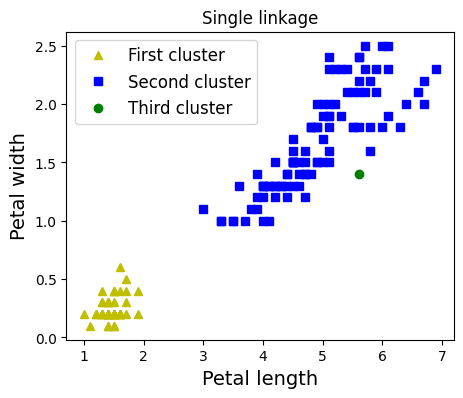

In [ ]:
ACS_single = AgglomerativeClusteringScratch(n_clusters=3, linkage='single')
y_pred = ACS_single.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Single linkage")
plt.show()

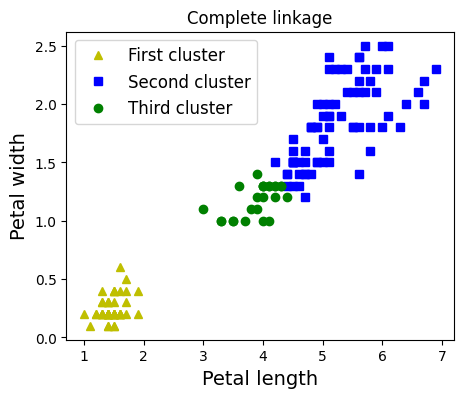

In [ ]:
ACS_comp = AgglomerativeClusteringScratch(n_clusters=3, linkage='complete')
y_pred = ACS_comp.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Complete linkage")
plt.show()

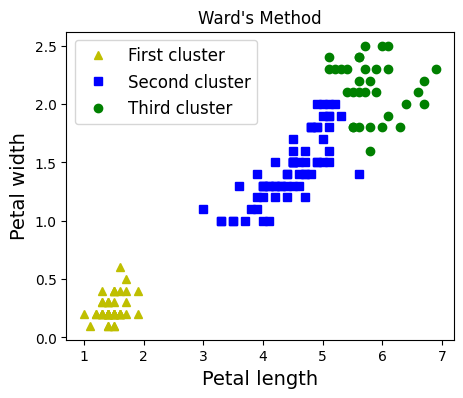

In [5]:
ACS_ward = AgglomerativeClusteringScratch(n_clusters=3, linkage='ward')
y_pred = ACS_ward.fit_predict(X_scaled)

plt.figure(figsize=(5,4))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "y^", label="First cluster") # Attributes 3rd and 4th of the instances assigned to the 1st cluster
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Second cluster")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "go", label="Third cluster")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.title("Ward's Method")
plt.show()

### Agglomerative Clustering usage on the penguins dataset

In [ ]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
folder_path = path
print(os.listdir(folder_path))

csv_path = os.path.join(folder_path, 'penguins_size.csv') # เลือก penguins_size.csv
penguins = pd.read_csv(csv_path).dropna()

X = penguins.drop(['species','island','sex'], axis=1)
y = penguins.species.astype('category').cat.codes
print(y.unique())

penguins

['penguins_size.csv', 'penguins_lter.csv']
[0 1 2]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X).iloc[:, :4]
X_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.897653,0.783487,-1.429521,-0.571229
1,-0.824290,0.121896,-1.072408,-0.509011
2,-0.677564,0.427246,-0.429605,-1.193405
4,-1.337831,1.088836,-0.572450,-0.944535
5,-0.860972,1.750427,-0.786718,-0.695664
...,...,...,...,...
338,0.587947,-1.761093,0.927425,0.890886
340,0.514584,-1.455743,0.998847,0.797560
341,1.174851,-0.743261,1.498806,1.917477
342,0.221132,-1.201285,0.784580,1.233083


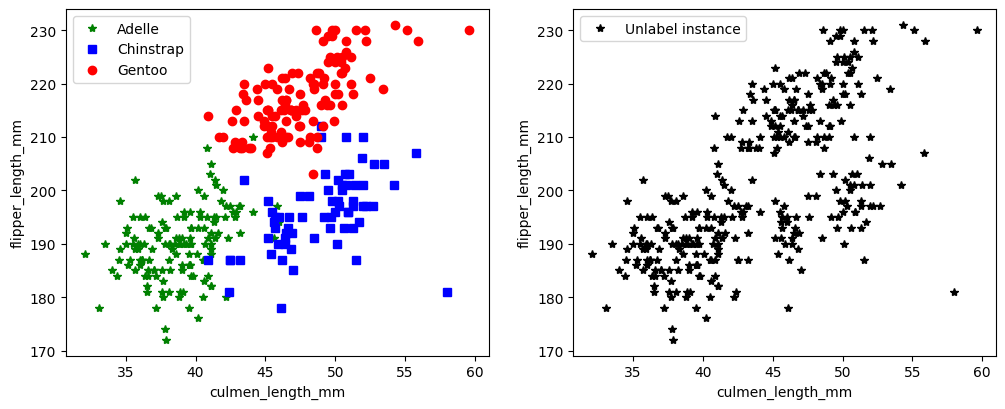

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#unlabeled samples
plt.subplot(122,)
plt.plot(X[:]['culmen_length_mm'], X[:]['flipper_length_mm'], "k*", label="Unlabel instance")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
plt.show()

### Average linkage example

In [ ]:
agg_clust_avg = AgglomerativeClustering(metric='euclidean', linkage='average', n_clusters=3)  #3 kinds of penguins
X_avg = X.copy(deep=True)
X_avg['cluster'] = agg_clust_avg.fit_predict(X_scaled)
# X_avg

In [ ]:
print(agg_clust_avg.feature_names_in_)
print(agg_clust_avg.n_leaves_)

['culmen_length_mm' 'culmen_depth_mm' 'flipper_length_mm' 'body_mass_g']
334


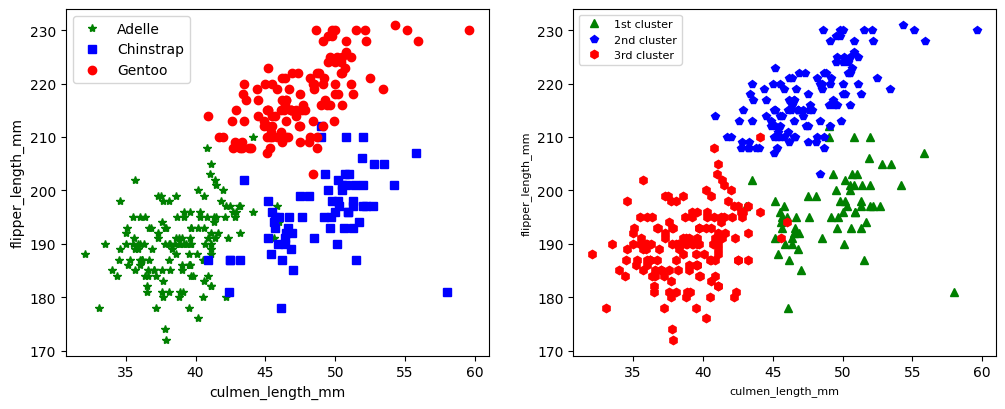

In [ ]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#clustered samples
plt.subplot(122,)
plt.plot(X[X_avg['cluster']==0]['culmen_length_mm'], X[X_avg['cluster']==0]['flipper_length_mm'], "g^", label="1st cluster")
plt.plot(X[X_avg['cluster']==1]['culmen_length_mm'], X[X_avg['cluster']==1]['flipper_length_mm'], "bp", label="2nd cluster")
plt.plot(X[X_avg['cluster']==2]['culmen_length_mm'], X[X_avg['cluster']==2]['flipper_length_mm'], "rh", label="3rd cluster")
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

### Complete linkage example

In [ ]:
agg_clust_cmp = AgglomerativeClustering(metric='euclidean', linkage='complete', n_clusters=3)  #3 kinds of penguins
X_cmp = X.copy(deep=True)
X_cmp['cluster'] = agg_clust_cmp.fit_predict(X_scaled)
# X_cmp

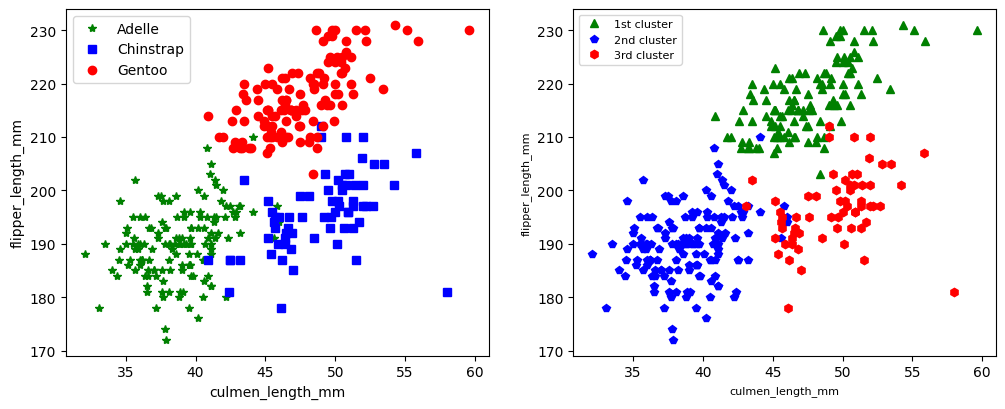

In [ ]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#clustered samples
plt.subplot(122,)
plt.plot(X[X_cmp['cluster']==0]['culmen_length_mm'], X[X_cmp['cluster']==0]['flipper_length_mm'], "g^", label="1st cluster")
plt.plot(X[X_cmp['cluster']==1]['culmen_length_mm'], X[X_cmp['cluster']==1]['flipper_length_mm'], "bp", label="2nd cluster")
plt.plot(X[X_cmp['cluster']==2]['culmen_length_mm'], X[X_cmp['cluster']==2]['flipper_length_mm'], "rh", label="3rd cluster")
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

### Ward's method example

In [ ]:
agg_clust_wrd = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=3)  #3 kinds of penguins
X_wrd = X.copy(deep=True)
X_wrd['cluster'] = agg_clust_wrd.fit_predict(X_scaled)
# X_wrd

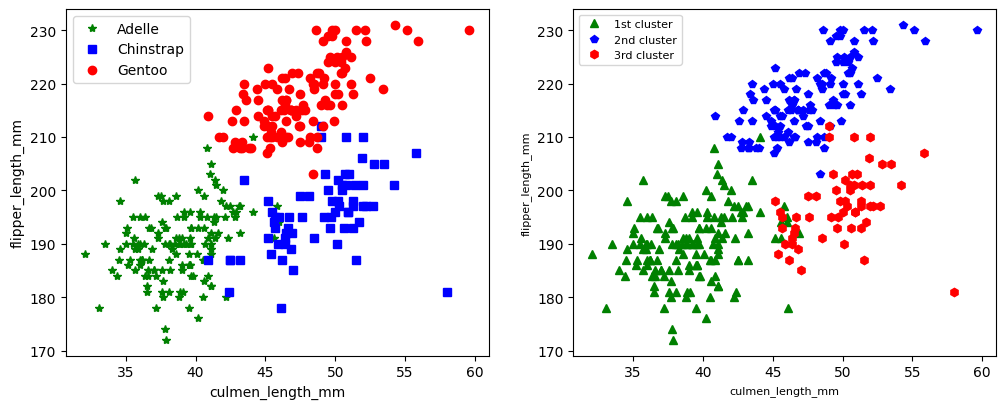

In [ ]:
plt.figure(figsize=(12, 4.5))
#labeled samples
plt.subplot(121,)
plt.plot(X[y==0]['culmen_length_mm'], X[y==0]['flipper_length_mm'], "g*", label="Adelle")
plt.plot(X[y==1]['culmen_length_mm'], X[y==1]['flipper_length_mm'], "bs", label="Chinstrap")
plt.plot(X[y==2]['culmen_length_mm'], X[y==2]['flipper_length_mm'], "ro", label="Gentoo")
plt.xlabel("culmen_length_mm", fontsize=10)
plt.ylabel("flipper_length_mm", fontsize=10)
plt.legend(fontsize=10)
#clustered samples
plt.subplot(122,)
plt.plot(X[X_wrd['cluster']==0]['culmen_length_mm'], X[X_wrd['cluster']==0]['flipper_length_mm'], "g^", label="1st cluster")
plt.plot(X[X_wrd['cluster']==1]['culmen_length_mm'], X[X_wrd['cluster']==1]['flipper_length_mm'], "bp", label="2nd cluster")
plt.plot(X[X_wrd['cluster']==2]['culmen_length_mm'], X[X_wrd['cluster']==2]['flipper_length_mm'], "rh", label="3rd cluster")
plt.xlabel("culmen_length_mm", fontsize=8)
plt.ylabel("flipper_length_mm", fontsize=8)
plt.legend(fontsize=8)
plt.show()

----
# Homework

จาก Fish dataset ที่กำหนด จงสังเกตและทดลองใช้ Agglomerative Clustering เพื่อทำแบ่งประเภทชนิดของปลาจากข้อมูลที่มีอยู่ให้ได้ผลลัพธ์ออกมา **เหมาะสมที่สุด** และสรุปผลดังนี้

1. แปลงข้อมูลแบบลดขนาด (PCA) เพื่อเทียบข้อมูลก่อนและหลังวิเคราะห์ส่วนประกอบพื้นฐาน
2. จากกการ plot ภาพข้อมูล Fish dataset แบบ Unlabel นักศึกษาคิดว่าจำนวน Cluster ที่ **เหมาะสมที่สุด** สำหรับ Dataset นี้คือเท่าใด
3. ทดลองใช้ Agglomerative Clustering (n_clusters ตามที่เลือกในข้อ 1) และเลือกปรับ linkage เป็นดังนี้ ['single', 'complete', 'average', 'ward'] แล้วบันทึกภาพผลลัพธ์การทำ Clustering
4. จงสรุปว่า linkage ที่ **เหมาะสมที่สุด** สำหรับการทำ Clustering สำหรับ Dataset นี้คือประเภทใด


In [3]:
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("taweilo/fish-species-sampling-weight-and-height-data")

print("Path to dataset files:", path)
fish = pd.read_csv(os.path.join(path, 'fish_data.csv'))
fish.head()

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\taweilo\fish-species-sampling-weight-and-height-data\versions\3


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


Dataset Information:
• Shape: (4080, 4)
• Columns: ['species', 'length', 'weight', 'w_l_ratio']
• Species: ['Anabas testudineus' 'Coilia dussumieri' 'Otolithoides biauritus'
 'Otolithoides pama' 'Pethia conchonius' 'Polynemus paradiseus'
 'Puntius lateristriga' 'Setipinna taty' 'Sillaginopsis panijus']
• Species counts:
  - Setipinna taty: 480
  - Anabas testudineus: 476
  - Pethia conchonius: 475
  - Otolithoides biauritus: 468
  - Polynemus paradiseus: 458
  - Sillaginopsis panijus: 455
  - Otolithoides pama: 435
  - Puntius lateristriga: 418
  - Coilia dussumieri: 415

Dataset statistics:
            length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782
std       7.114684     1.040365     0.123046
min       6.360000     2.050000     0.080000
25%      11.327500     3.070000     0.170000
50%      17.350000     3.310000     0.190000
75%      22.585000     4.100000     0.340000
max      33.860000     6.290000     0.640

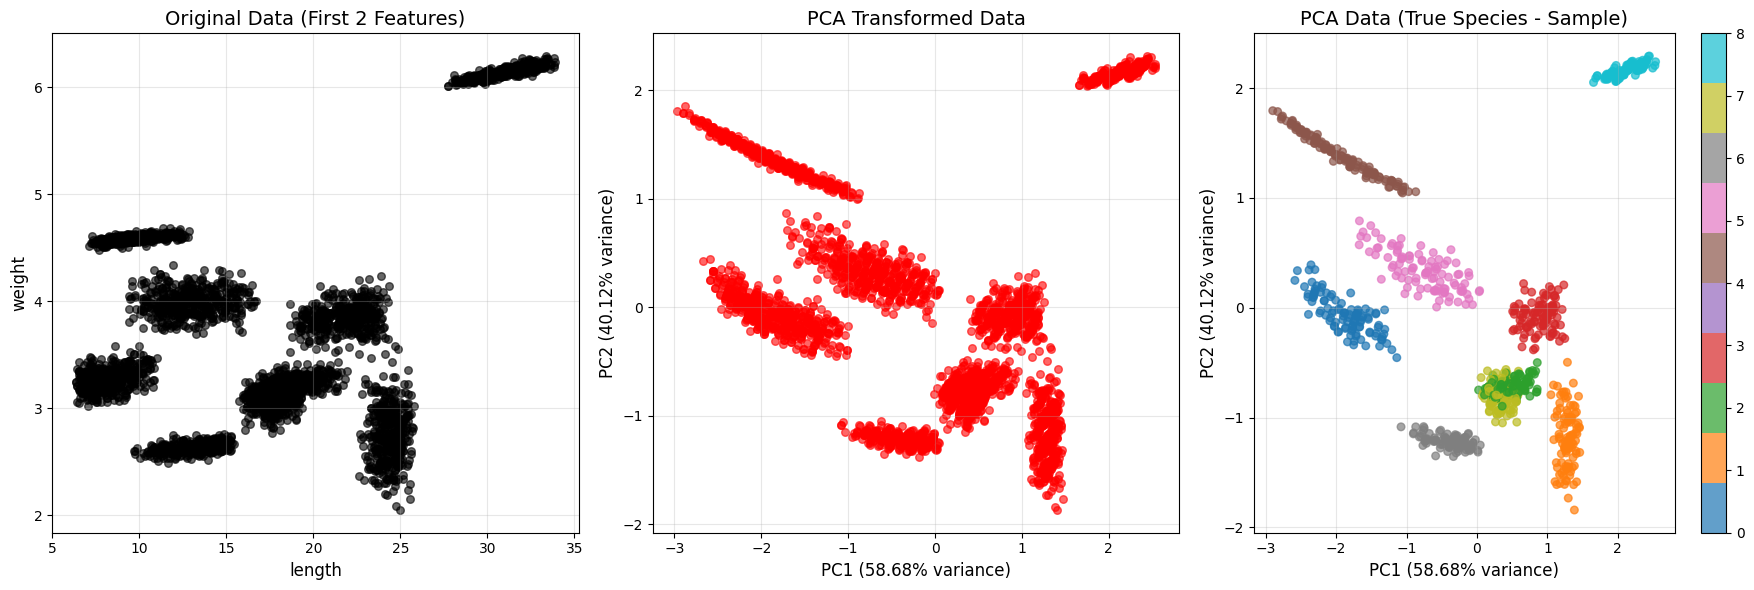


ข้อ 2: Optimal Number of Clusters

Testing different numbers of clusters:
• n_clusters=2: Silhouette=0.4855, Calinski=3352.13, Davies-Bouldin=0.8295
• n_clusters=2: Silhouette=0.4855, Calinski=3352.13, Davies-Bouldin=0.8295
• n_clusters=3: Silhouette=0.6318, Calinski=8481.32, Davies-Bouldin=0.4946
• n_clusters=3: Silhouette=0.6318, Calinski=8481.32, Davies-Bouldin=0.4946
• n_clusters=4: Silhouette=0.5853, Calinski=8035.06, Davies-Bouldin=0.6080
• n_clusters=4: Silhouette=0.5853, Calinski=8035.06, Davies-Bouldin=0.6080
• n_clusters=5: Silhouette=0.5254, Calinski=8860.68, Davies-Bouldin=0.5975
• n_clusters=5: Silhouette=0.5254, Calinski=8860.68, Davies-Bouldin=0.5975
• n_clusters=6: Silhouette=0.5600, Calinski=9867.77, Davies-Bouldin=0.5298
• n_clusters=6: Silhouette=0.5600, Calinski=9867.77, Davies-Bouldin=0.5298
• n_clusters=7: Silhouette=0.5968, Calinski=12480.69, Davies-Bouldin=0.5369
• n_clusters=7: Silhouette=0.5968, Calinski=12480.69, Davies-Bouldin=0.5369
• n_clusters=8: Silhoue

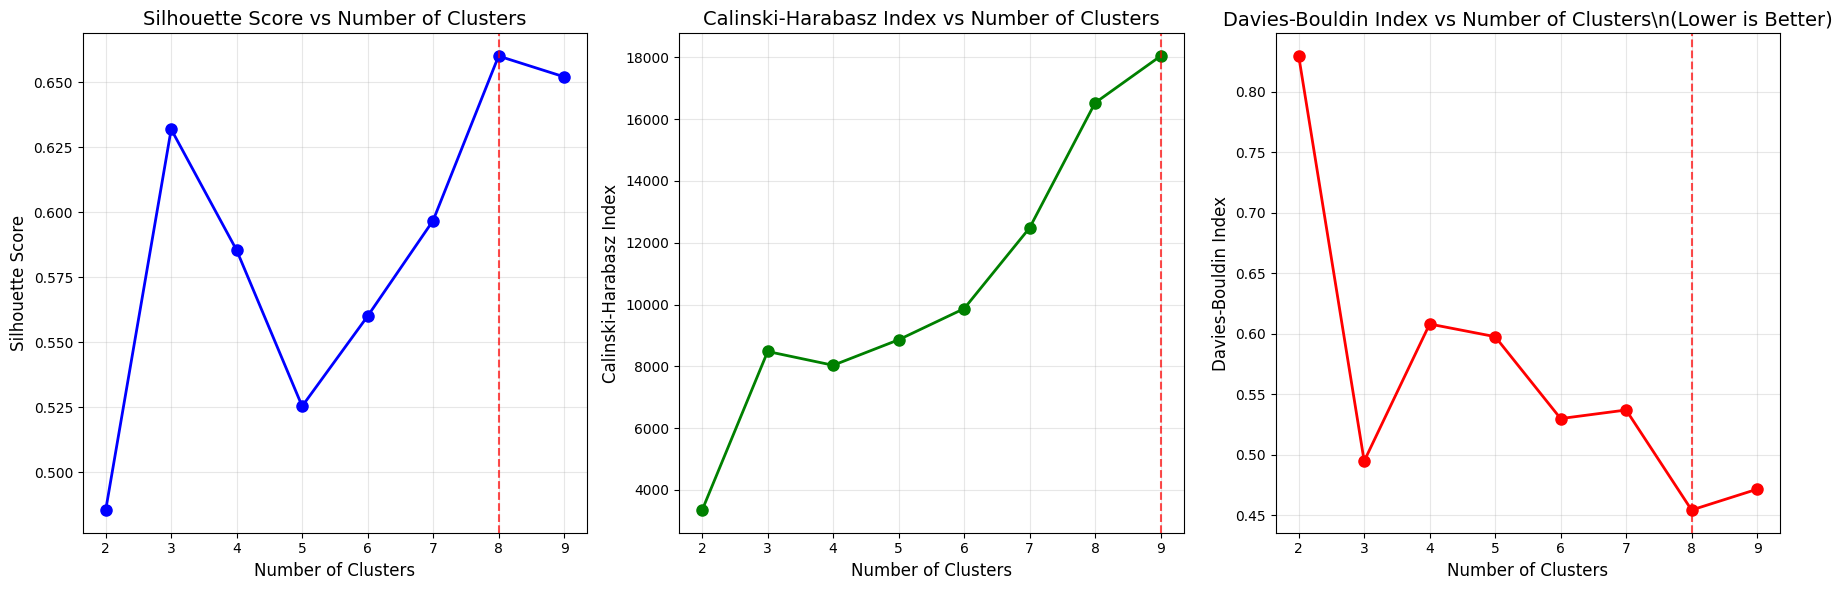


Optimal clusters by different metrics:
• Silhouette Score: 8 clusters (score: 0.6600)
• Calinski-Harabasz: 9 clusters (score: 18039.75)
• Davies-Bouldin: 8 clusters (score: 0.4542)
Actual number of species in dataset: 9

Selected number of clusters for homework: 8

ข้อ 3: Testing Different Linkage Methods
Testing each linkage method separately...

Testing single linkage...
  Clusters found: [0 1 2 3 4 5 6 7]
  Cluster sizes: [1386  476  412  457  455  418    1  475]
  • Silhouette Score: 0.527133
  • Calinski-Harabasz: 10702.102011
  • Davies-Bouldin: 0.564398
  • Adjusted Rand Index: 0.699879

Testing complete linkage...
  Clusters found: [0 1 2 3 4 5 6 7]
  Cluster sizes: [1386  476  412  457  455  418    1  475]
  • Silhouette Score: 0.527133
  • Calinski-Harabasz: 10702.102011
  • Davies-Bouldin: 0.564398
  • Adjusted Rand Index: 0.699879

Testing complete linkage...
  Clusters found: [0 1 2 3 4 5 6 7]
  Cluster sizes: [ 626 1381  417  418  155  455  334  294]
  • Silhouette Score

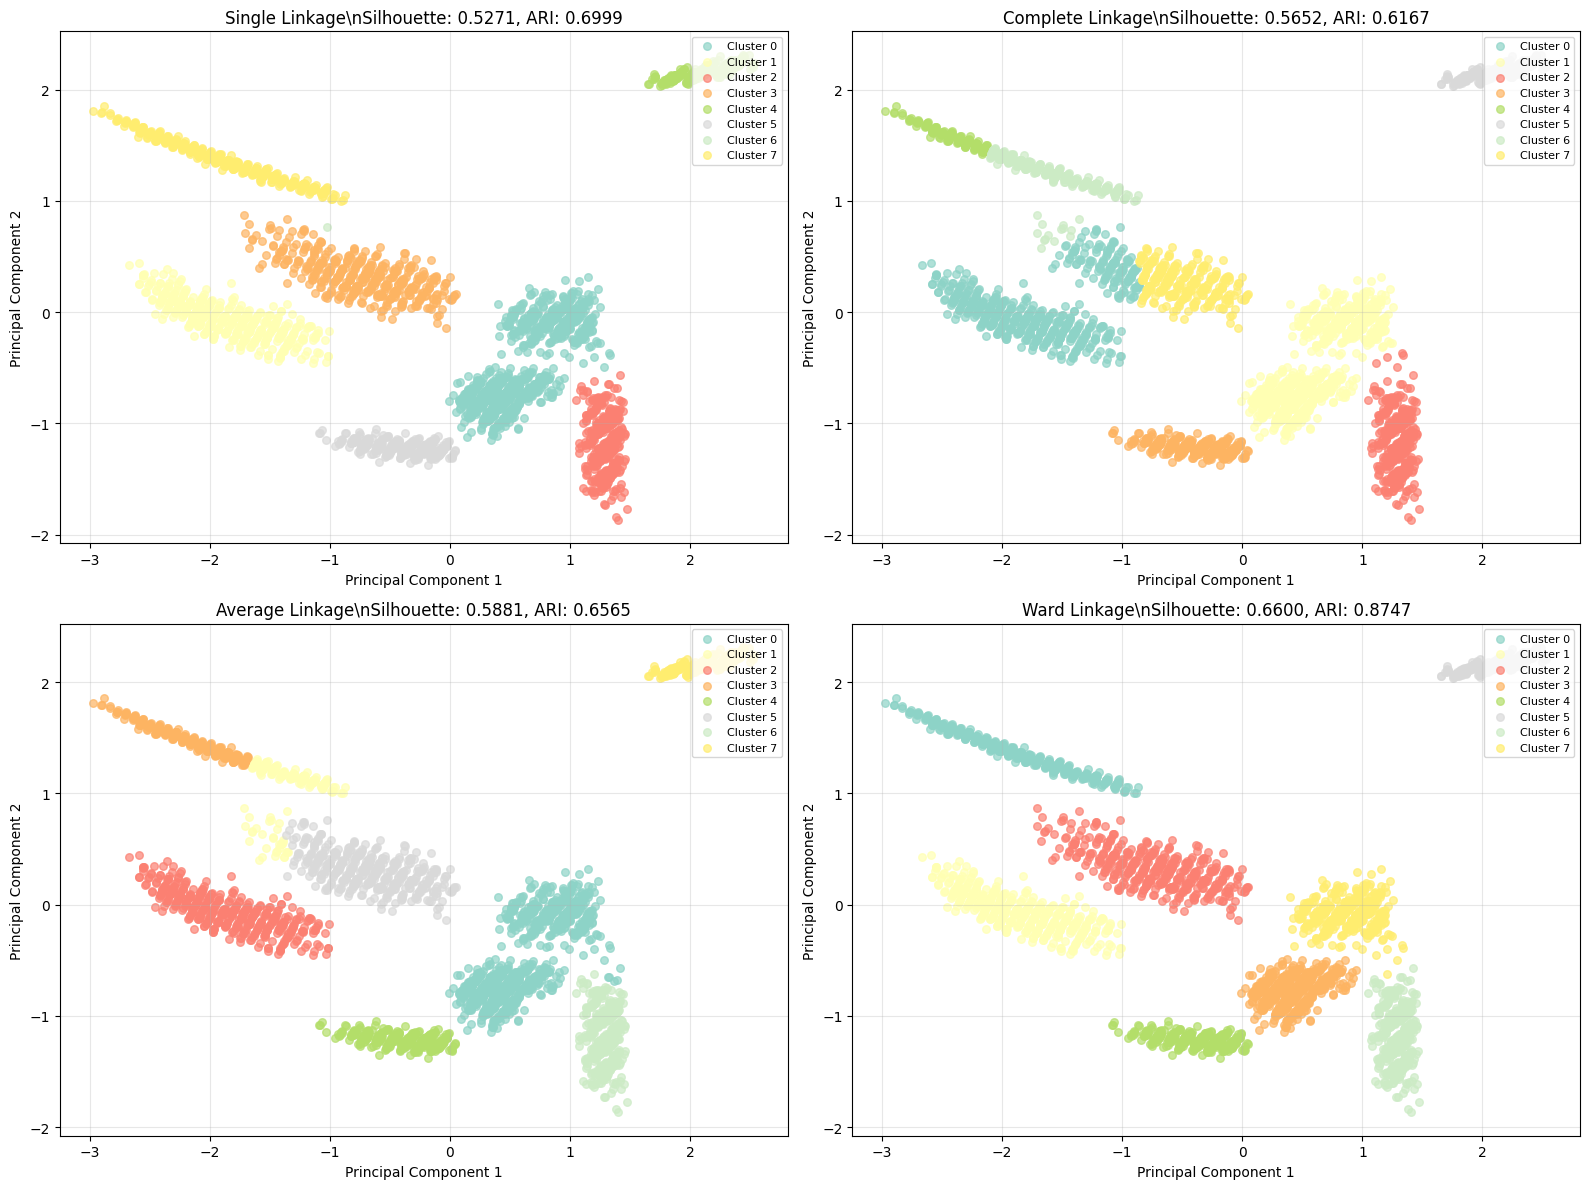


ข้อ 4: Best Linkage Method Analysis
Comprehensive Comparison Table:
    Linkage  Silhouette_Score  Calinski_Harabasz  Davies_Bouldin  ARI_Score
0    single          0.527133       10702.102011        0.564398   0.699879
1  complete          0.565194       11367.782573        0.562336   0.616674
2   average          0.588060       12511.793274        0.550610   0.656489
3      ward          0.659992       16525.564163        0.454183   0.874678

Best linkage by each metric:
• Silhouette Score: ward (0.659992)
• Calinski-Harabasz: ward (16525.564163)
• Davies-Bouldin: ward (0.454183)
• ARI Score: ward (0.874678)


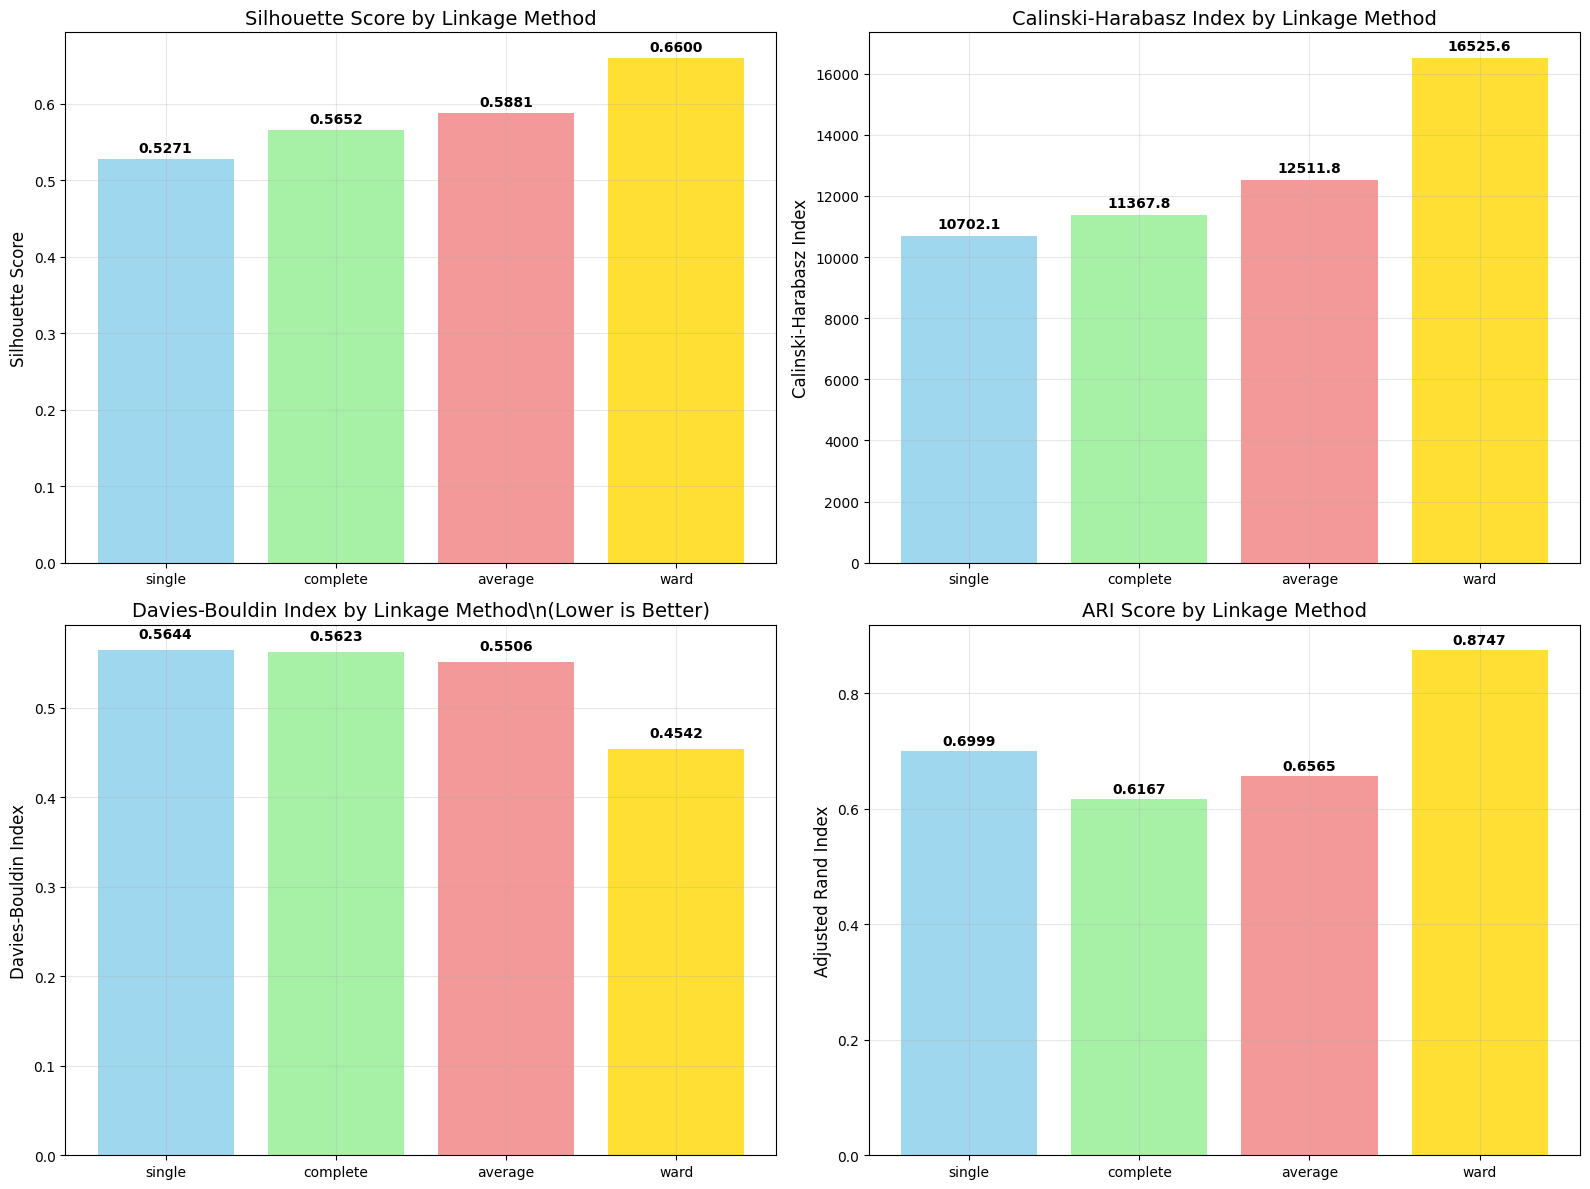


**FINAL RECOMMENDATION: WARD LINKAGE**
   Composite score: 1.0000

Ranking by composite score:
   1. ward: 1.0000
   2. average: 0.2622
   3. complete: 0.1049
   4. single: 0.0806


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and examine the fish dataset
print("Dataset Information:")
print(f"• Shape: {fish.shape}")
print(f"• Columns: {list(fish.columns)}")
print(f"• Species: {fish['species'].unique()}")
print(f"• Species counts:")
for species, count in fish['species'].value_counts().items():
    print(f"  - {species}: {count}")

print(f"\nDataset statistics:")
print(fish.describe())

# ================================
# ข้อ 1: แปลงข้อมูลแบบลดขนาด (PCA)
# ================================
print(f"\n{'='*50}")
print("ข้อ 1: PCA Transformation")
print(f"{'='*50}")

# Prepare data
X = fish.drop('species', axis=1)
y_true = fish['species'].astype('category').cat.codes  # For evaluation
species_names = fish['species'].astype('category').cat.categories

print(f"Species mapping:")
for i, species in enumerate(species_names):
    print(f"  {i}: {species}")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca_model = PCA(n_components=2)
pca_data = pca_model.fit_transform(X_scaled)

print(f"\nOriginal data shape: {X.shape}")
print(f"PCA data shape: {pca_data.shape}")
print(f"Explained variance ratio: {pca_model.explained_variance_ratio_}")
print(f"Total explained variance: {pca_model.explained_variance_ratio_.sum():.4f}")

# Plot original data vs PCA data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original data (first two features)
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c='black', alpha=0.6, s=30)
axes[0].set_xlabel(X.columns[0], fontsize=12)
axes[0].set_ylabel(X.columns[1], fontsize=12)
axes[0].set_title("Original Data (First 2 Features)", fontsize=14)
axes[0].grid(True, alpha=0.3)

# PCA data
axes[1].scatter(pca_data[:,0], pca_data[:,1], c='red', alpha=0.6, s=30)
axes[1].set_xlabel(f"PC1 ({pca_model.explained_variance_ratio_[0]:.2%} variance)", fontsize=12)
axes[1].set_ylabel(f"PC2 ({pca_model.explained_variance_ratio_[1]:.2%} variance)", fontsize=12)
axes[1].set_title("PCA Transformed Data", fontsize=14)
axes[1].grid(True, alpha=0.3)

# PCA data colored by true species (sample to see structure)
sample_indices = np.random.choice(len(pca_data), 1000, replace=False)
scatter = axes[2].scatter(pca_data[sample_indices, 0], pca_data[sample_indices, 1], 
                         c=y_true.iloc[sample_indices], cmap='tab10', alpha=0.7, s=30)
axes[2].set_xlabel(f"PC1 ({pca_model.explained_variance_ratio_[0]:.2%} variance)", fontsize=12)
axes[2].set_ylabel(f"PC2 ({pca_model.explained_variance_ratio_[1]:.2%} variance)", fontsize=12)
axes[2].set_title("PCA Data (True Species - Sample)", fontsize=14)
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[2])

plt.tight_layout()
plt.show()

# ================================
# ข้อ 2: กำหนดจำนวน Cluster ที่เหมาะสม
# ================================
print(f"\n{'='*50}")
print("ข้อ 2: Optimal Number of Clusters")
print(f"{'='*50}")

# Test different numbers of clusters using multiple metrics
n_clusters_range = range(2, 10)
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print(f"\nTesting different numbers of clusters:")
for n in n_clusters_range:
    # Use Ward linkage for determining optimal clusters
    agg_clust = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_clust.fit_predict(pca_data)
    
    sil_score = silhouette_score(pca_data, labels)
    cal_score = calinski_harabasz_score(pca_data, labels)
    db_score = davies_bouldin_score(pca_data, labels)
    
    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)
    davies_bouldin_scores.append(db_score)
    
    print(f"• n_clusters={n}: Silhouette={sil_score:.4f}, Calinski={cal_score:.2f}, Davies-Bouldin={db_score:.4f}")

# Plot all metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Silhouette scores
axes[0].plot(n_clusters_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score vs Number of Clusters', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(n_clusters_range)
best_sil_n = n_clusters_range[np.argmax(silhouette_scores)]
axes[0].axvline(x=best_sil_n, color='red', linestyle='--', alpha=0.7)

# Calinski-Harabasz scores
axes[1].plot(n_clusters_range, calinski_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters', fontsize=12)
axes[1].set_ylabel('Calinski-Harabasz Index', fontsize=12)
axes[1].set_title('Calinski-Harabasz Index vs Number of Clusters', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(n_clusters_range)
best_cal_n = n_clusters_range[np.argmax(calinski_scores)]
axes[1].axvline(x=best_cal_n, color='red', linestyle='--', alpha=0.7)

# Davies-Bouldin scores (lower is better)
axes[2].plot(n_clusters_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters', fontsize=12)
axes[2].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[2].set_title('Davies-Bouldin Index vs Number of Clusters\\n(Lower is Better)', fontsize=14)
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(n_clusters_range)
best_db_n = n_clusters_range[np.argmin(davies_bouldin_scores)]
axes[2].axvline(x=best_db_n, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"\nOptimal clusters by different metrics:")
print(f"• Silhouette Score: {best_sil_n} clusters (score: {max(silhouette_scores):.4f})")
print(f"• Calinski-Harabasz: {best_cal_n} clusters (score: {max(calinski_scores):.2f})")
print(f"• Davies-Bouldin: {best_db_n} clusters (score: {min(davies_bouldin_scores):.4f})")

# Also check the actual number of species
actual_species = len(fish['species'].unique())
print(f"Actual number of species in dataset: {actual_species}")

# Choose best performing metric
optimal_clusters = best_sil_n  # Using silhouette as primary metric
print(f"\nSelected number of clusters for homework: {optimal_clusters}")

# ================================
# ข้อ 3: ทดลองใช้ Agglomerative Clustering แต่ละ linkage
# ================================
print(f"\n{'='*50}")
print("ข้อ 3: Testing Different Linkage Methods")
print(f"{'='*50}")

linkage_methods = ['single', 'complete', 'average', 'ward']
clustering_results = {}

print("Testing each linkage method separately...")

# Test each linkage method with proper debugging
for linkage in linkage_methods:
    print(f"\nTesting {linkage} linkage...")
    
    # Create fresh clustering object for each test
    agg_clust = AgglomerativeClustering(
        n_clusters=optimal_clusters, 
        linkage=linkage, 
        metric='euclidean'
    )
    
    # Fit and predict
    labels = agg_clust.fit_predict(pca_data)
    
    # Verify clustering actually happened
    unique_labels = np.unique(labels)
    print(f"  Clusters found: {unique_labels}")
    print(f"  Cluster sizes: {np.bincount(labels)}")
    
    # Calculate metrics
    silhouette_avg = silhouette_score(pca_data, labels)
    calinski_avg = calinski_harabasz_score(pca_data, labels)
    davies_bouldin_avg = davies_bouldin_score(pca_data, labels)
    ari_score = adjusted_rand_score(y_true, labels)
    
    clustering_results[linkage] = {
        'labels': labels.copy(),
        'silhouette': silhouette_avg,
        'calinski': calinski_avg,
        'davies_bouldin': davies_bouldin_avg,
        'ari': ari_score,
        'cluster_sizes': np.bincount(labels)
    }
    
    print(f"  • Silhouette Score: {silhouette_avg:.6f}")
    print(f"  • Calinski-Harabasz: {calinski_avg:.6f}")
    print(f"  • Davies-Bouldin: {davies_bouldin_avg:.6f}")
    print(f"  • Adjusted Rand Index: {ari_score:.6f}")

# Plot clustering results for each linkage method
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, linkage in enumerate(linkage_methods):
    labels = clustering_results[linkage]['labels']
    silhouette_score_val = clustering_results[linkage]['silhouette']
    ari_score_val = clustering_results[linkage]['ari']
    
    # Create color map
    unique_labels = np.unique(labels)
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
    
    for j, label in enumerate(unique_labels):
        mask = (labels == label)
        axes[i].scatter(pca_data[mask, 0], pca_data[mask, 1], 
                       c=[colors[j]], label=f'Cluster {label}', 
                       alpha=0.7, s=30)
    
    axes[i].set_xlabel('Principal Component 1', fontsize=10)
    axes[i].set_ylabel('Principal Component 2', fontsize=10)
    axes[i].set_title(f'{linkage.capitalize()} Linkage\\n'
                      f'Silhouette: {silhouette_score_val:.4f}, ARI: {ari_score_val:.4f}', 
                      fontsize=12)
    axes[i].legend(fontsize=8, loc='upper right')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# ข้อ 4: สรุป linkage ที่เหมาะสมที่สุด
# ================================
print(f"\n{'='*50}")
print("ข้อ 4: Best Linkage Method Analysis")
print(f"{'='*50}")

# Create comprehensive comparison table
comparison_df = pd.DataFrame({
    'Linkage': linkage_methods,
    'Silhouette_Score': [clustering_results[link]['silhouette'] for link in linkage_methods],
    'Calinski_Harabasz': [clustering_results[link]['calinski'] for link in linkage_methods],
    'Davies_Bouldin': [clustering_results[link]['davies_bouldin'] for link in linkage_methods],
    'ARI_Score': [clustering_results[link]['ari'] for link in linkage_methods]
})

print("Comprehensive Comparison Table:")
print(comparison_df.round(6))

# Find best linkage for each metric
best_linkage_silhouette = comparison_df.loc[comparison_df['Silhouette_Score'].idxmax(), 'Linkage']
best_linkage_calinski = comparison_df.loc[comparison_df['Calinski_Harabasz'].idxmax(), 'Linkage']
best_linkage_davies = comparison_df.loc[comparison_df['Davies_Bouldin'].idxmin(), 'Linkage']  # Lower is better
best_linkage_ari = comparison_df.loc[comparison_df['ARI_Score'].idxmax(), 'Linkage']

print(f"\nBest linkage by each metric:")
print(f"• Silhouette Score: {best_linkage_silhouette} ({comparison_df['Silhouette_Score'].max():.6f})")
print(f"• Calinski-Harabasz: {best_linkage_calinski} ({comparison_df['Calinski_Harabasz'].max():.6f})")
print(f"• Davies-Bouldin: {best_linkage_davies} ({comparison_df['Davies_Bouldin'].min():.6f})")
print(f"• ARI Score: {best_linkage_ari} ({comparison_df['ARI_Score'].max():.6f})")

# Create comprehensive bar plot comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Silhouette scores
axes[0, 0].bar(linkage_methods, comparison_df['Silhouette_Score'], 
              color=['skyblue', 'lightgreen', 'lightcoral', 'gold'], alpha=0.8)
axes[0, 0].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 0].set_title('Silhouette Score by Linkage Method', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(comparison_df['Silhouette_Score']):
    axes[0, 0].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Calinski-Harabasz scores
axes[0, 1].bar(linkage_methods, comparison_df['Calinski_Harabasz'], 
              color=['skyblue', 'lightgreen', 'lightcoral', 'gold'], alpha=0.8)
axes[0, 1].set_ylabel('Calinski-Harabasz Index', fontsize=12)
axes[0, 1].set_title('Calinski-Harabasz Index by Linkage Method', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
for i, v in enumerate(comparison_df['Calinski_Harabasz']):
    axes[0, 1].text(i, v + max(comparison_df['Calinski_Harabasz'])*0.01, f'{v:.1f}', 
                   ha='center', va='bottom', fontweight='bold')

# Davies-Bouldin scores (lower is better)
axes[1, 0].bar(linkage_methods, comparison_df['Davies_Bouldin'], 
              color=['skyblue', 'lightgreen', 'lightcoral', 'gold'], alpha=0.8)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index by Linkage Method\\n(Lower is Better)', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)
for i, v in enumerate(comparison_df['Davies_Bouldin']):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# ARI scores
axes[1, 1].bar(linkage_methods, comparison_df['ARI_Score'], 
              color=['skyblue', 'lightgreen', 'lightcoral', 'gold'], alpha=0.8)
axes[1, 1].set_ylabel('Adjusted Rand Index', fontsize=12)
axes[1, 1].set_title('ARI Score by Linkage Method', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)
for i, v in enumerate(comparison_df['ARI_Score']):
    axes[1, 1].text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate composite score for final recommendation
# Normalize scores to 0-1 range for fair comparison
comparison_df['Silhouette_Norm'] = (comparison_df['Silhouette_Score'] - comparison_df['Silhouette_Score'].min()) / (comparison_df['Silhouette_Score'].max() - comparison_df['Silhouette_Score'].min())
comparison_df['Calinski_Norm'] = (comparison_df['Calinski_Harabasz'] - comparison_df['Calinski_Harabasz'].min()) / (comparison_df['Calinski_Harabasz'].max() - comparison_df['Calinski_Harabasz'].min())
comparison_df['Davies_Norm'] = 1 - ((comparison_df['Davies_Bouldin'] - comparison_df['Davies_Bouldin'].min()) / (comparison_df['Davies_Bouldin'].max() - comparison_df['Davies_Bouldin'].min()))  # Invert because lower is better
comparison_df['ARI_Norm'] = (comparison_df['ARI_Score'] - comparison_df['ARI_Score'].min()) / (comparison_df['ARI_Score'].max() - comparison_df['ARI_Score'].min())

# Composite score (equal weights)
comparison_df['Composite_Score'] = (comparison_df['Silhouette_Norm'] + comparison_df['Calinski_Norm'] + comparison_df['Davies_Norm'] + comparison_df['ARI_Norm']) / 4

recommended_linkage = comparison_df.loc[comparison_df['Composite_Score'].idxmax(), 'Linkage']
composite_score = comparison_df['Composite_Score'].max()

print(f"\n**FINAL RECOMMENDATION: {recommended_linkage.upper()} LINKAGE**")
print(f"   Composite score: {composite_score:.4f}")
print(f"\nRanking by composite score:")
ranking_df = comparison_df.sort_values('Composite_Score', ascending=False)
for i, (idx, row) in enumerate(ranking_df.iterrows()):
    print(f"   {i+1}. {row['Linkage']}: {row['Composite_Score']:.4f}")
print(f"{'='*80}")